# Training Model - Unbalance Data

# Import Library

In [1]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Read Data

In [2]:
#Read data X_train dan y_train hasil dari data preparation
X_train_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_train_clean.pkl") 
y_train = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_train.pkl")

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_valid_clean.pkl")
y_valid = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_valid.pkl")

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_test_clean.pkl")
y_test = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_test.pkl")

## Baseline Model

In [3]:
y_train.value_counts(normalize = True)
# baseline akurasi = 80%
# Before Smote Sampling

0    0.795429
1    0.204571
Name: Exited, dtype: float64

In [4]:
y_baseline_predict = y_train.mean()
y_baseline_predict

0.20457142857142857

## Logistic Regression

In [5]:
# Build Logistic Regression
logreg_awal = LogisticRegression(random_state = 123)

In [6]:
# fit Logistic Regression
logreg_awal.fit(X_train_clean, y_train)

LogisticRegression(random_state=123)

In [7]:
# Melihat Score dari model logreg
logreg_awal.score(X_train_clean, y_train)

0.8071428571428572

In [8]:
#Prediksi Logreg
logreg_pred = logreg_awal.predict(X_test_clean)

In [9]:
#Melihat Classification report
print(classification_report(y_test, logreg_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1424
           1       0.62      0.24      0.34       376

    accuracy                           0.81      1800
   macro avg       0.72      0.60      0.62      1800
weighted avg       0.78      0.81      0.77      1800



In [10]:
#Melihat score data train, validation dan test
print("Train_Score = ", logreg_awal.score(X_train_clean, y_train), 
      "Valid_Score = ",logreg_awal.score(X_valid_clean, y_valid),
      "Test_Score = ", logreg_awal.score(X_test_clean, y_test))

Train_Score =  0.8071428571428572 Valid_Score =  0.8266666666666667 Test_Score =  0.81


## Tuning Parameter Logistic Regression

In [11]:
logreg = LogisticRegression(random_state = 123)

In [12]:
# Membentuk parameter untuk eksperimentasi
lr_param_grid = {
    'C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty' : ['l1', 'l2', 'elasticnet','none']
}

In [13]:
# Cross Validation menggunakan GridsearchCV
lr_grid = GridSearchCV(LogisticRegression(random_state = 123), lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [14]:
#Fitting Model lr grid
lr_grid.fit(X_train_clean, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.806 total time=   0.5s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.807 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.801 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1,

[CV 1/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.05, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.05, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.05, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.05, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.05, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.05, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.05, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ......C=0.05, p

[CV 5/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.794 total time=   0.0s
[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.818 total time=   0.0s
[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.806 total time=   0.0s
[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.811 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.813 total time=   0.0s
[CV 2/5] END C=0.1, penalty

[CV 2/5] END .......C=0.5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.5, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 2/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 3/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.818 total time=   0.1s
[CV 4/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.809 total time=   0.0s
[CV 5/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.815 total time=   0.0s
[CV 2/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 3/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.818 total time=   0.0s
[CV 4/5] END C=0.5, penal

[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.817 total time=   0.0s
[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.809 total time=   0.0s
[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.805 total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.815 total time=   0.0s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.818 total time=   0.0s
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.809 total time=   0.0s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.805 total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.815 total time=   0.0s
[CV 2/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 3/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.818 total time=   0.0s
[CV 4/5] END .C=1, penalty=l

[CV 3/5] END ......C=5, penalty=l1, solver=saga;, score=0.818 total time=   0.2s
[CV 4/5] END ......C=5, penalty=l1, solver=saga;, score=0.809 total time=   0.2s
[CV 5/5] END ......C=5, penalty=l1, solver=saga;, score=0.805 total time=   0.2s
[CV 1/5] END .C=5, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END .C=5, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 3/5] END .C=5, penalty=l2, solver=liblinear;, score=0.818 total time=   0.0s
[CV 4/5] END .C=5, penalty=l2, solver=liblinear;, score=0.808 total time=   0.0s
[CV 5/5] END .C=5, penalty=l2, solver=liblinear;, score=0.804 total time=   0.0s
[CV 1/5] END .C=5, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.0s
[CV 2/5] END .C=5, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 3/5] END .C=5, penalty=l2, solver=newton-cg;, score=0.818 total time=   0.0s
[CV 4/5] END .C=5, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.0s
[CV 5/5] END .C=5, penalty=l

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [15]:
#Melihat parameter terbaik untuk model
print(lr_grid.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [16]:
#Input parameter terbaik hasil GridsearchCV
lr_grid_cv  = LogisticRegression(C = lr_grid.best_params_["C"],
                                 penalty = lr_grid.best_params_["penalty"],
                                 solver = lr_grid.best_params_["solver"])

#Kembali fitting model
lr_grid_cv.fit(X_train_clean, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [17]:
print(f"Training Data Score: {lr_grid_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {lr_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lr_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.8097142857142857
Validating Data Score: 0.8283333333333334
Testing Data Score: 0.8116666666666666


In [18]:
#Prediksi dengan menggunakan data test
logregtun_pred = lr_grid_cv.predict(X_test_clean)

In [19]:
#Melihat Classification report
print(classification_report(y_test, logregtun_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1424
           1       0.64      0.23      0.33       376

    accuracy                           0.81      1800
   macro avg       0.73      0.60      0.61      1800
weighted avg       0.79      0.81      0.77      1800



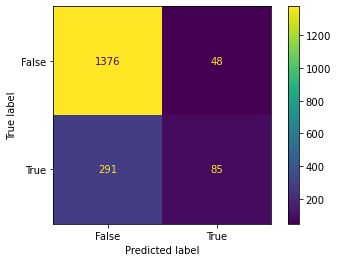

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, logregtun_pred, display_labels = [False, True])
plt.show()

## Support Vector Classifier

In [21]:
svc_ori = SVC(random_state = 123)

In [22]:
# fit Support Vector Classifier
svc_ori.fit(X_train_clean, y_train)

SVC(random_state=123)

In [23]:
#Cek Score model SVC
svc_ori.score(X_train_clean, y_train)

0.8611428571428571

In [24]:
svc_predict = svc_ori.predict(X_test_clean)

In [25]:
print(classification_report(y_test, svc_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1424
           1       0.86      0.39      0.53       376

    accuracy                           0.86      1800
   macro avg       0.86      0.68      0.72      1800
weighted avg       0.86      0.86      0.84      1800



In [26]:
print(f"Training Data Score: {svc_ori.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {svc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.8611428571428571
Validating Data Score: 0.8633333333333333
Testing Data Score: 0.8583333333333333


## Tuning Parameter SVC

In [27]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'gamma': ['scale', 'auto']
             }

In [28]:
#Membentuk parameter untuk eksperimentasi
svc_grid = GridSearchCV(SVC(random_state = 123), 
                        param_grid, 
                        verbose=3, 
                        cv= 5, 
                        n_jobs=4, 
                        scoring='accuracy')

In [29]:
#Melakukan fitting model gridsearchcv
svc_grid.fit(X_train_clean, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=4,
             param_grid={'C': [0.0005, 0.001, 0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [30]:
#Melihat parameter terbaik
svc_grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}

In [31]:
#Melakukan input parameter terbaik hasil gridsearch
svc_grid_cv  = SVC(kernel = svc_grid.best_params_["kernel"],
                   gamma = svc_grid.best_params_["gamma"],
                   C = svc_grid.best_params_["C"]
                  )

In [32]:
svc_grid_cv.fit(X_train_clean, y_train)

SVC(C=0.5)

In [33]:
print(f"Training Data Score: {svc_grid_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {svc_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.8537142857142858
Validating Data Score: 0.8583333333333333
Testing Data Score: 0.85


In [34]:
svc_pred_cv = svc_grid_cv.predict(X_test_clean)

In [35]:
print(classification_report(y_test, svc_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1424
           1       0.88      0.32      0.47       376

    accuracy                           0.85      1800
   macro avg       0.87      0.66      0.69      1800
weighted avg       0.85      0.85      0.82      1800



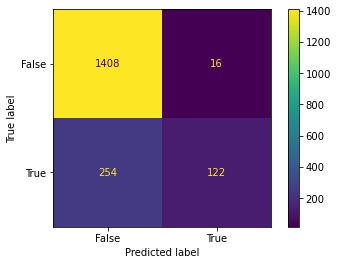

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred_cv, display_labels = [False, True])
plt.show()

## Decisiontree

In [37]:
# Model Decision Tree
decTree = DecisionTreeClassifier(random_state = 123)

In [38]:
# Fitting model
decTree.fit(X_train_clean, y_train)

DecisionTreeClassifier(random_state=123)

In [39]:
# Model score
decTree.score(X_train_clean, y_train)

1.0

In [40]:
#Prediksi data menggunakan data test
dectree_predict = decTree.predict(X_test_clean)

In [41]:
#Melihat Classification report
print(classification_report(y_test, dectree_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1424
           1       0.52      0.53      0.53       376

    accuracy                           0.80      1800
   macro avg       0.70      0.70      0.70      1800
weighted avg       0.80      0.80      0.80      1800



In [42]:
#Melihat score prediksi dari data train, valid dan test
print(f"Training Data Score: {decTree.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {decTree.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8041666666666667
Testing Data Score: 0.7988888888888889


## Tuning Parameter Decisiontree

In [43]:
# Buat parameter untuk eksperimen
decTree_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                "criterion": ["gini", "entropy", "log_loss"],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],}

In [44]:
# Buat plan eksperimentasi
random_decTree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123),
                              param_grid = decTree_param,
                              cv = 5,
                              scoring = "accuracy") 

In [45]:
# Lakukan fitting eksperimentasi
random_decTree.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [46]:
random_decTree.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [47]:
# Buat model
best_decTree = DecisionTreeClassifier(max_depth = random_decTree.best_params_["max_depth"],
                                      criterion = random_decTree.best_params_["criterion"],
                                      min_samples_leaf = random_decTree.best_params_["min_samples_leaf"],
                                      min_samples_split = random_decTree.best_params_["min_samples_split"],
                                      random_state = 123)

In [48]:
# Fit model
best_decTree.fit(X_train_clean, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       random_state=123)

In [49]:
# Cek Train data
best_decTree.score(X_train_clean, y_train)

0.8682857142857143

In [50]:
y_predict_dectree = best_decTree.predict(X_test_clean)

In [51]:
print(classification_report(y_test, y_predict_dectree))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1424
           1       0.78      0.46      0.58       376

    accuracy                           0.86      1800
   macro avg       0.83      0.71      0.75      1800
weighted avg       0.85      0.86      0.85      1800



In [52]:
print(f"Training Data Score: {best_decTree.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {best_decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {best_decTree.score(X_test_clean, y_test)}")

Training Data Score: 0.8682857142857143
Validating Data Score: 0.8625
Testing Data Score: 0.86


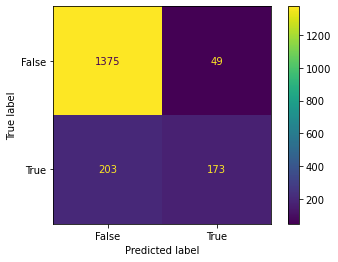

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_dectree, display_labels = [False, True])
plt.show()

## Randomforest Classifier

In [54]:
# Build random forest
random_forest = RandomForestClassifier(n_estimators = 100, 
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6, 
                                       min_samples_leaf=8,
                                       random_state = 123)

In [55]:
random_forest.fit(X_train_clean, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [56]:
random_forest.fit(X_train_clean, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [57]:
# Model score
random_forest.score(X_train_clean, y_train)

0.8597142857142858

In [58]:
y_pred_rf = random_forest.predict(X_test_clean)

In [59]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1424
           1       0.85      0.37      0.51       376

    accuracy                           0.85      1800
   macro avg       0.85      0.67      0.71      1800
weighted avg       0.85      0.85      0.83      1800



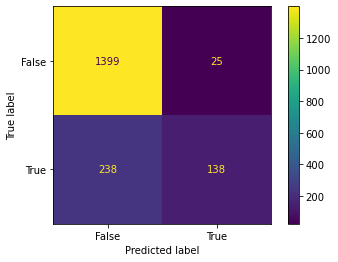

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels = [False, True])
plt.show()

## Tuning Parameter Randomforest

In [61]:
# Buat parameter untuk eksperimen
random_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'n_estimators': [50, 100, 200],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                "criterion": ["gini", "entropy"]
                }

In [62]:
# Buat plan eksperimentasi
random_forestcls = GridSearchCV(estimator = RandomForestClassifier(random_state=123),
                                param_grid = random_param,
                                cv = 5,
                                scoring = "accuracy") 

In [63]:
# Lakukan fitting eksperimentasi
random_forestcls.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [64]:
random_forestcls.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [65]:
# Buat model
random_forestcls_cv = RandomForestClassifier(max_depth = random_forestcls.best_params_["max_depth"],
                                             criterion = random_forestcls.best_params_["criterion"],
                                             n_estimators = random_forestcls.best_params_["n_estimators"],
                                             min_samples_leaf = random_forestcls.best_params_["min_samples_leaf"],
                                             min_samples_split = random_forestcls.best_params_["min_samples_split"],
                                             random_state = 123)

In [66]:
# Fit model
random_forestcls_cv.fit(X_train_clean, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=123)

In [67]:
predict_randomcls_cv = random_forestcls_cv.predict(X_test_clean)

In [68]:
print(classification_report(y_test, predict_randomcls_cv))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1424
           1       0.81      0.47      0.59       376

    accuracy                           0.87      1800
   macro avg       0.84      0.72      0.76      1800
weighted avg       0.86      0.87      0.85      1800



In [69]:
print(f"Training Data Score: {random_forestcls_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {random_forestcls_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {random_forestcls_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.8997142857142857
Validating Data Score: 0.8691666666666666
Testing Data Score: 0.8655555555555555


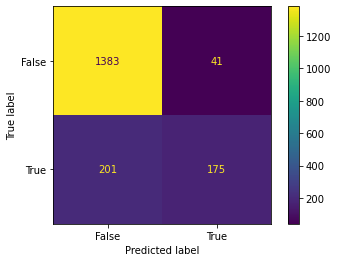

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_randomcls_cv, display_labels = [False, True])
plt.show()

## Ridge Classifier

In [71]:
ridge = RidgeClassifier(random_state = 123) #create a ridge classifier object

In [72]:
ridge.fit(X_train_clean, y_train) #train the model

RidgeClassifier(random_state=123)

In [73]:
ridge.score(X_train_clean, y_train)

0.805

In [74]:
pred_ridge = ridge.predict(X_test_clean)

In [75]:
print(classification_report(y_test, pred_ridge, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1424
           1       0.63      0.12      0.21       376

    accuracy                           0.80      1800
   macro avg       0.72      0.55      0.55      1800
weighted avg       0.77      0.80      0.74      1800



In [76]:
print(f"Training Data Score: {ridge.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {ridge.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge.score(X_test_clean, y_test)}")

Training Data Score: 0.805
Validating Data Score: 0.8225
Testing Data Score: 0.8016666666666666


## Tuning Parameter Ridge Classifier

In [77]:
clf_ridge = RidgeClassifier(random_state = 123)

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

ridge_cv = GridSearchCV(estimator=clf_ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [78]:
ridge_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=RidgeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='accuracy')

In [79]:
ridge_cv.best_params_

{'alpha': 0.1}

In [80]:
# Buat model
ridge_cv = RidgeClassifier(alpha = ridge_cv.best_params_["alpha"],
                           random_state = 123)

In [81]:
# Fit model
ridge_cv.fit(X_train_clean, y_train)

RidgeClassifier(alpha=0.1, random_state=123)

In [82]:
# Cek Test data
ridge_cv.score(X_train_clean, y_train)

0.805

In [83]:
predict_ridgecv = ridge_cv.predict(X_test_clean)

In [84]:
print(classification_report(y_test, predict_ridgecv))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1424
           1       0.63      0.12      0.21       376

    accuracy                           0.80      1800
   macro avg       0.72      0.55      0.55      1800
weighted avg       0.77      0.80      0.74      1800



In [85]:
print(f"Training Data Score: {ridge_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {ridge_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.805
Validating Data Score: 0.8225
Testing Data Score: 0.8016666666666666


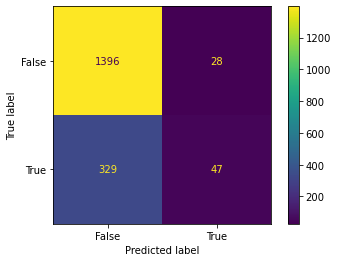

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_ridgecv, display_labels = [False, True])
plt.show()

## KNeighborsClassifier

In [87]:
# Build KNeighborsRegressor
knn_awal = KNeighborsClassifier()

In [88]:
# fit KNeighborsRegressor
knn_awal.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [89]:
knn_awal.score(X_train_clean, y_train)

0.8678571428571429

In [90]:
knn_pred = knn_awal.predict(X_test_clean)

In [91]:
print(classification_report(y_test, knn_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1424
           1       0.64      0.40      0.49       376

    accuracy                           0.83      1800
   macro avg       0.75      0.67      0.69      1800
weighted avg       0.81      0.83      0.81      1800



In [92]:
print(f"Training Data Score: {knn_awal.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {knn_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {knn_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.8678571428571429
Validating Data Score: 0.8391666666666666
Testing Data Score: 0.8277777777777777


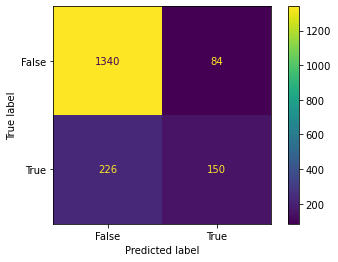

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, display_labels = [False, True])
plt.show()

## Tuning Parameter KNeighborsClassifier

In [94]:
kn_param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [95]:
knn = KNeighborsClassifier()

In [96]:
kn_grid = GridSearchCV(knn, kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [97]:
kn_grid.fit(X_train_clean, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.770 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.775 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.805 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.775 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.796 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.770 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.775 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.805 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.775 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.796 total time=   0.0s
[

[CV 3/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.833 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.834 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.831 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.819 total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.813 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.825 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.822 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.831 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.830 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.816 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=dista

[CV 1/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.833 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.815 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.834 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.832 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.836 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.829 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.811 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.828 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.824 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.834 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=19, weights=di

[CV 3/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.827 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.821 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.831 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.824 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.812 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.830 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.821 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.831 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.819 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.810 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=28, weights=un

[CV 3/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.828 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.821 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.822 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.820 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.811 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.824 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.826 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.825 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.816 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.811 total time=   0.1s
[CV 3/5] END al

[CV 1/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.825 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.814 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.829 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.829 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.836 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.829 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.816 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.836 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.829 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.835 total time=   0.1s
[CV 1

[CV 4/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.829 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.831 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.829 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.816 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.834 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.830 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.836 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.825 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.809 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.831 total time=   0.1s
[CV 4

[CV 2/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.811 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.829 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.822 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.831 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.770 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.775 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.805 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.775 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.796 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.770 total time=   0.0s
[CV 2/5] END algorithm=

[CV 2/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.811 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.830 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.834 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.831 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.829 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.812 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.833 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.834 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.831 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=10, weights=uniform;, score=0.819 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, n_

[CV 2/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.816 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.830 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.829 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.834 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.826 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.811 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.824 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.822 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.829 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=18, weights=distance;, score=0.833 total time=   0.1s
[CV 2/5] END algorithm=kd

[CV 2/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.809 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.826 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.822 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.829 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.824 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.810 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.834 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.823 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.832 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=27, weights=uniform;, score=0.822 total time=   0.1s
[CV 2/5] END algorithm=kd

[CV 3/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.819 total time=   0.1s
[CV 4/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.811 total time=   0.2s
[CV 5/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.812 total time=   0.1s
[CV 1/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.812 total time=   0.2s
[CV 2/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.807 total time=   0.2s
[CV 3/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.827 total time=   0.2s
[CV 4/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.819 total time=   0.2s
[CV 5/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.821 total time=   0.2s
[CV 1/5] END algorithm=brute, n_neighbors=5, weights=distance;, score=0.811 total time=   0.1s
[CV 2/5] END algorithm=brute, n_neighbors=5, weights=distance;, score=0.808 total time=   0.1s
[CV 3/5] END algorithm=brute, n_neighbors=5, weights=di

[CV 5/5] END algorithm=brute, n_neighbors=13, weights=uniform;, score=0.836 total time=   0.2s
[CV 1/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.831 total time=   0.2s
[CV 2/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.819 total time=   0.3s
[CV 3/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.835 total time=   0.2s
[CV 4/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.828 total time=   0.2s
[CV 5/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.833 total time=   0.2s
[CV 1/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.825 total time=   0.2s
[CV 2/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.814 total time=   0.2s
[CV 3/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.829 total time=   0.2s
[CV 4/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.829 total time=   0.2s
[CV 5/5] END algorithm=brute, n_neighbors=14,

[CV 1/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.826 total time=   0.2s
[CV 2/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.806 total time=   0.2s
[CV 3/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.829 total time=   0.2s
[CV 4/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.829 total time=   0.2s
[CV 5/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.831 total time=   0.2s
[CV 1/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.829 total time=   0.1s
[CV 2/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.816 total time=   0.2s
[CV 3/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.834 total time=   0.2s
[CV 4/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.830 total time=   0.2s
[CV 5/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.836 total time=   0.1s
[CV 1/5] END algorithm=brute, n_neighbors=23,

[CV 2/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.811 total time=   0.1s
[CV 3/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.829 total time=   0.1s
[CV 4/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.822 total time=   0.2s
[CV 5/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.831 total time=   0.1s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [98]:
print(kn_grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'distance'}


In [99]:
# Refit the KNeighborsRegressor
kn_grid = KNeighborsClassifier(n_neighbors = kn_grid.best_params_["n_neighbors"],
                               weights = kn_grid.best_params_["weights"],
                               algorithm = kn_grid.best_params_["algorithm"]
                              )

In [100]:
kn_grid.fit(X_train_clean, y_train)

KNeighborsClassifier(n_neighbors=18, weights='distance')

In [101]:
knn_cvpred = kn_grid.predict(X_test_clean)

In [102]:
print(classification_report(y_test, knn_cvpred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1424
           1       0.70      0.27      0.39       376

    accuracy                           0.82      1800
   macro avg       0.77      0.62      0.64      1800
weighted avg       0.81      0.82      0.79      1800



In [103]:
print(f"Training Data Score: {kn_grid.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {kn_grid.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {kn_grid.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.85
Testing Data Score: 0.8233333333333334


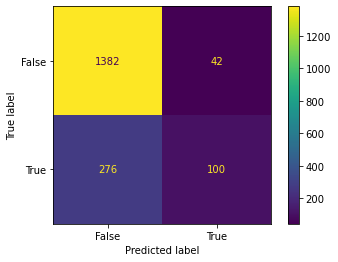

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_cvpred, display_labels = [False, True])
plt.show()

### Bagging Classifier

In [105]:
dec_tree = DecisionTreeClassifier(random_state=123)

In [106]:
bagging_cls = BaggingClassifier(base_estimator=dec_tree, n_estimators=10, random_state=123)

In [107]:
# fit KNeighborsRegressor
bagging_cls.fit(X_train_clean, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123),
                  random_state=123)

In [108]:
bagging_cls.score(X_train_clean, y_train)

0.9844285714285714

In [109]:
bagging_predict = bagging_cls.predict(X_test_clean)

In [110]:
print(classification_report(y_test, bagging_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1424
           1       0.75      0.49      0.59       376

    accuracy                           0.86      1800
   macro avg       0.81      0.72      0.75      1800
weighted avg       0.85      0.86      0.85      1800



In [111]:
print(f"Training Data Score: {bagging_cls.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {bagging_cls.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cls.score(X_test_clean, y_test)}")

Training Data Score: 0.9844285714285714
Validating Data Score: 0.85
Testing Data Score: 0.8588888888888889


## Tuning Parameter Bagging Classifier

In [112]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
bagging_param_grid = {'n_estimators' : [10, 100, 1000]}

In [113]:
bagging_grid_cv = GridSearchCV(estimator=BaggingClassifier(random_state=123), 
                               param_grid=bagging_param_grid, 
                               n_jobs=-1, 
                               cv=cv, 
                               scoring='accuracy',
                               error_score=0)

In [114]:
bagging_grid_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=123),
             error_score=0, estimator=BaggingClassifier(random_state=123),
             n_jobs=-1, param_grid={'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [115]:
bagging_grid_cv.best_params_

{'n_estimators': 1000}

In [116]:
bagging_cv  = BaggingClassifier(n_estimators = bagging_grid_cv.best_params_["n_estimators"])

In [117]:
bagging_cv.fit(X_train_clean, y_train)

BaggingClassifier(n_estimators=1000)

In [118]:
baggingcv_predict = bagging_cv.predict(X_test_clean)

In [119]:
print(classification_report(y_test, baggingcv_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1424
           1       0.74      0.52      0.61       376

    accuracy                           0.86      1800
   macro avg       0.81      0.74      0.76      1800
weighted avg       0.85      0.86      0.85      1800



In [120]:
print(f"Training Data Score: {bagging_cv.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {bagging_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cv.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8683333333333333
Testing Data Score: 0.8616666666666667


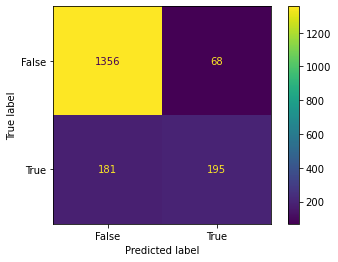

In [121]:
ConfusionMatrixDisplay.from_predictions(y_test, baggingcv_predict, display_labels = [False, True])
plt.show()

## Gradient Boosting

In [122]:
# Build GradientBoosting
grad_boost = GradientBoostingClassifier(random_state = 123)

In [123]:
# Fit GradientBoosting
grad_boost.fit(X_train_clean, y_train)

GradientBoostingClassifier(random_state=123)

In [124]:
grad_boost.score(X_train_clean, y_train)

0.8718571428571429

In [125]:
gradboost_predict = grad_boost.predict(X_test_clean)

In [126]:
print(classification_report(y_test, gradboost_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1424
           1       0.80      0.52      0.63       376

    accuracy                           0.87      1800
   macro avg       0.84      0.74      0.78      1800
weighted avg       0.87      0.87      0.86      1800



In [127]:
print(f"Training Data Score: {grad_boost.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {grad_boost.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {grad_boost.score(X_test_clean, y_test)}")

Training Data Score: 0.8718571428571429
Validating Data Score: 0.88
Testing Data Score: 0.8722222222222222


### Tuning Parameter Gradient Boosting

In [128]:
grad_param_grid = {
    'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9]
}

In [129]:
grad_grid_cv = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=grad_param_grid,
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)

In [130]:
grad_grid_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, error_score=0, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 7, 9], 'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [131]:
grad_grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

In [132]:
gradboost_cv  = GradientBoostingClassifier(n_estimators = grad_grid_cv.best_params_["n_estimators"],
                                           learning_rate = grad_grid_cv.best_params_["learning_rate"],
                                           subsample = grad_grid_cv.best_params_["subsample"],
                                           max_depth = grad_grid_cv.best_params_["max_depth"],
                                           random_state = 123)

In [133]:
gradboost_cv.fit(X_train_clean, y_train)

GradientBoostingClassifier(random_state=123)

In [134]:
gradboost_pred_cv = gradboost_cv.predict(X_test_clean)

In [135]:
print(classification_report(y_test, gradboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1424
           1       0.80      0.52      0.63       376

    accuracy                           0.87      1800
   macro avg       0.84      0.74      0.78      1800
weighted avg       0.87      0.87      0.86      1800



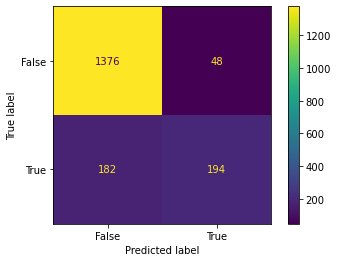

In [136]:
ConfusionMatrixDisplay.from_predictions(y_test, gradboost_pred_cv, display_labels = [False, True])
plt.show()

## Adaboost Classifier

### Adaboost SVC

In [137]:
svc = SVC(probability=True, kernel='linear', random_state = 123)

# Create adaboost classifer object
adaboost_svc = AdaBoostClassifier(n_estimators=50, 
                                  base_estimator=svc,
                                  learning_rate=1)

In [138]:
# Train Adaboost Classifer
adaboost_svc.fit(X_train_clean, y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                      random_state=123),
                   learning_rate=1)

In [139]:
adaboost_svc.score(X_train_clean, y_train)

0.7947142857142857

In [140]:
ada_predict = adaboost_svc.predict(X_test_clean)

In [141]:
print(classification_report(y_test, ada_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.50      0.00      0.01       376

    accuracy                           0.79      1800
   macro avg       0.65      0.50      0.44      1800
weighted avg       0.73      0.79      0.70      1800



In [142]:
print(f"Training Data Score: {adaboost_svc.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {adaboost_svc.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_svc.score(X_test_clean, y_test)}")

Training Data Score: 0.7947142857142857
Validating Data Score: 0.8083333333333333
Testing Data Score: 0.7911111111111111


### Adaboost Original

In [143]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state = 123)

In [144]:
# Train Adaboost Classifer
abc_ori = abc.fit(X_train_clean, y_train)

In [145]:
abc_ori.score(X_train_clean, y_train)

0.8532857142857143

In [146]:
adaboost_pred_ori = abc_ori.predict(X_test_clean)

In [147]:
print(classification_report(y_test, adaboost_pred_ori, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1424
           1       0.73      0.53      0.62       376

    accuracy                           0.86      1800
   macro avg       0.81      0.74      0.77      1800
weighted avg       0.85      0.86      0.85      1800



In [148]:
print(f"Training Data Score: {abc_ori.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {abc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {abc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.8532857142857143
Validating Data Score: 0.8733333333333333
Testing Data Score: 0.8616666666666667


## Tuning Parameter Adaboost

In [149]:
adaboost = AdaBoostClassifier(random_state = 123)

In [150]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [151]:
grid_search_adaboost = GridSearchCV(adaboost, param_grid, scoring='accuracy', cv=5)

In [152]:
grid_search_adaboost.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [153]:
print(grid_search_adaboost.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}


In [154]:
adaboost_best = AdaBoostClassifier(n_estimators = grid_search_adaboost.best_params_["n_estimators"],
                                   learning_rate = grid_search_adaboost.best_params_["learning_rate"],
                                   algorithm = grid_search_adaboost.best_params_["algorithm"]
                                  )

In [155]:
adaboost_best.fit(X_train_clean, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [156]:
adaboost_pred_cv = adaboost_best.predict(X_test_clean)

In [157]:
print(classification_report(y_test, adaboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1424
           1       0.77      0.47      0.59       376

    accuracy                           0.86      1800
   macro avg       0.82      0.72      0.75      1800
weighted avg       0.85      0.86      0.85      1800



In [158]:
print(f"Training Data Score: {adaboost_best.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {adaboost_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_best.score(X_test_clean, y_test)}")

Training Data Score: 0.8567142857142858
Validating Data Score: 0.87
Testing Data Score: 0.8605555555555555


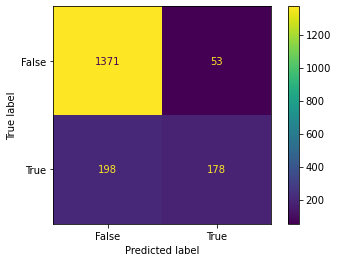

In [159]:
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_pred_cv, display_labels = [False, True])
plt.show()

## Extratrees Classifier

In [160]:
extra_trees_awal = ExtraTreesClassifier(random_state = 123)

In [161]:
extra_trees_awal.fit(X_train_clean, y_train)

ExtraTreesClassifier(random_state=123)

In [162]:
extra_trees_awal.score(X_train_clean, y_train)

1.0

In [163]:
y_extratress_pred = extra_trees_awal.predict(X_test_clean)

In [164]:
print(classification_report(y_test, y_extratress_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1424
           1       0.79      0.46      0.58       376

    accuracy                           0.86      1800
   macro avg       0.83      0.71      0.75      1800
weighted avg       0.85      0.86      0.85      1800



In [165]:
print(f"Training Data Score: {extra_trees_awal.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {extra_trees_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_awal.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8716666666666667
Testing Data Score: 0.8616666666666667


## Tuning Parameter Extratrees Classifier

In [166]:
extra_trees = ExtraTreesClassifier(random_state = 123)

In [167]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [168]:
grid_search_et = GridSearchCV(extra_trees, param_grid, scoring='accuracy', cv=5)

In [169]:
grid_search_et.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=123),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [170]:
print(grid_search_et.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [171]:
extra_trees_best = ExtraTreesClassifier(n_estimators = grid_search_et.best_params_["n_estimators"], 
                                        max_depth = grid_search_et.best_params_["max_depth"], 
                                        min_samples_split= grid_search_et.best_params_["min_samples_split"], 
                                        min_samples_leaf=grid_search_et.best_params_["min_samples_leaf"])

In [172]:
extra_trees_best.fit(X_train_clean, y_train)

ExtraTreesClassifier(max_depth=20, min_samples_split=5, n_estimators=50)

In [173]:
extratreescv_pred = extra_trees_best.predict(X_test_clean)

In [174]:
print(classification_report(y_test, extratreescv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1424
           1       0.82      0.44      0.57       376

    accuracy                           0.86      1800
   macro avg       0.84      0.71      0.74      1800
weighted avg       0.86      0.86      0.85      1800



In [175]:
print(f"Training Data Score: {extra_trees_best.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {extra_trees_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_best.score(X_test_clean, y_test)}")

Training Data Score: 0.9745714285714285
Validating Data Score: 0.8733333333333333
Testing Data Score: 0.8622222222222222


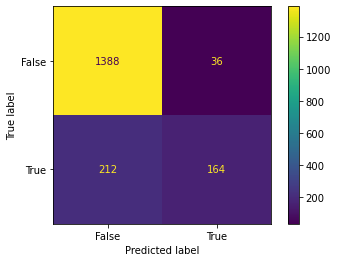

In [176]:
ConfusionMatrixDisplay.from_predictions(y_test, extratreescv_pred, display_labels = [False, True])
plt.show()

## XGboost Classifier

In [177]:
xgb_classifier = xgb.XGBClassifier(random_state = 123)

In [178]:
xgb_classifier.fit(X_train_clean, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [179]:
xgb_classifier.score(X_train_clean, y_train)

0.9605714285714285

In [180]:
xgb_pred = xgb_classifier.predict(X_test_clean)

In [181]:
print(classification_report(y_test, xgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      1424
           1       0.73      0.53      0.62       376

    accuracy                           0.86      1800
   macro avg       0.81      0.74      0.77      1800
weighted avg       0.85      0.86      0.85      1800



In [182]:
print(f"Training Data Score: {xgb_classifier.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {xgb_classifier.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {xgb_classifier.score(X_test_clean, y_test)}")

Training Data Score: 0.9605714285714285
Validating Data Score: 0.8641666666666666
Testing Data Score: 0.8605555555555555


## Tuning Parameter XGboost

In [183]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}


In [184]:
grid_search_xg = GridSearchCV(xgb_classifier, param_grid, scoring='accuracy', cv=5)

In [185]:
grid_search_xg.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [186]:
print(grid_search_xg.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [187]:
xgb_best = xgb.XGBClassifier(n_estimators = grid_search_xg.best_params_["n_estimators"], 
                             max_depth = grid_search_xg.best_params_["max_depth"], 
                             learning_rate = grid_search_xg.best_params_["learning_rate"], 
                             subsample = grid_search_xg.best_params_["subsample"])

In [188]:
xgb_best.fit(X_train_clean, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [189]:
xgboost_cv_pred = xgb_best.predict(X_test_clean)

In [190]:
print(classification_report(y_test, xgboost_cv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1424
           1       0.78      0.52      0.62       376

    accuracy                           0.87      1800
   macro avg       0.83      0.74      0.77      1800
weighted avg       0.86      0.87      0.86      1800



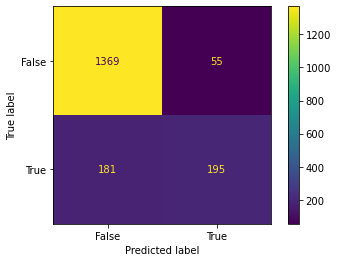

In [191]:
ConfusionMatrixDisplay.from_predictions(y_test, xgboost_cv_pred, display_labels = [False, True])
plt.show()

## Deep Learning

In [192]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [193]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [194]:
history = model.fit(X_train_clean, y_train, epochs=500, batch_size=32, validation_data=(X_valid_clean, y_valid))

Epoch 1/500
219/219 [==============================] - 5s 5ms/step - loss: 0.4706 - accuracy: 0.7899 - val_loss: 0.4032 - val_accuracy: 0.8233
Epoch 2/500
219/219 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.8053 - val_loss: 0.3999 - val_accuracy: 0.8242
Epoch 3/500
219/219 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.8150 - val_loss: 0.3977 - val_accuracy: 0.8342
Epoch 4/500
219/219 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8211 - val_loss: 0.3872 - val_accuracy: 0.8450
Epoch 5/500
219/219 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8240 - val_loss: 0.3852 - val_accuracy: 0.8442
Epoch 6/500
219/219 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.8286 - val_loss: 0.3857 - val_accuracy: 0.8483
Epoch 7/500
219/219 [==============================] - 1s 2ms/step - loss: 0.4085 - accuracy: 0.8331 - val_loss: 0.3769 - val_accuracy: 0.8458

Epoch 58/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3201 - accuracy: 0.8697 - val_loss: 0.3228 - val_accuracy: 0.8708
Epoch 59/500
219/219 [==============================] - 1s 3ms/step - loss: 0.3256 - accuracy: 0.8687 - val_loss: 0.3194 - val_accuracy: 0.8700
Epoch 60/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8689 - val_loss: 0.3212 - val_accuracy: 0.8725
Epoch 61/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8659 - val_loss: 0.3181 - val_accuracy: 0.8750
Epoch 62/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3195 - accuracy: 0.8670 - val_loss: 0.3185 - val_accuracy: 0.8742
Epoch 63/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8704 - val_loss: 0.3208 - val_accuracy: 0.8733
Epoch 64/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3172 - accuracy: 0.8657 - val_loss: 0.3203 - val_accuracy:

Epoch 115/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3028 - accuracy: 0.8741 - val_loss: 0.3325 - val_accuracy: 0.8692
Epoch 116/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3029 - accuracy: 0.8707 - val_loss: 0.3295 - val_accuracy: 0.8717
Epoch 117/500
219/219 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8740 - val_loss: 0.3351 - val_accuracy: 0.8742
Epoch 118/500
219/219 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8719 - val_loss: 0.3308 - val_accuracy: 0.8683
Epoch 119/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.8786 - val_loss: 0.3341 - val_accuracy: 0.8708
Epoch 120/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3044 - accuracy: 0.8740 - val_loss: 0.3307 - val_accuracy: 0.8683
Epoch 121/500
219/219 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.8741 - val_loss: 0.3319 - val_ac

219/219 [==============================] - 1s 2ms/step - loss: 0.2862 - accuracy: 0.8804 - val_loss: 0.3428 - val_accuracy: 0.8675
Epoch 228/500
219/219 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.8863 - val_loss: 0.3425 - val_accuracy: 0.8692
Epoch 229/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2855 - accuracy: 0.8769 - val_loss: 0.3383 - val_accuracy: 0.8717
Epoch 230/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2886 - accuracy: 0.8814 - val_loss: 0.3421 - val_accuracy: 0.8667
Epoch 231/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2834 - accuracy: 0.8833 - val_loss: 0.3439 - val_accuracy: 0.8700
Epoch 232/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2829 - accuracy: 0.8826 - val_loss: 0.3458 - val_accuracy: 0.8683
Epoch 233/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2795 - accuracy: 0.8844 - val_loss: 0.3427 - val_accuracy: 0.8700

219/219 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.8839 - val_loss: 0.3443 - val_accuracy: 0.8675
Epoch 340/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.8876 - val_loss: 0.3470 - val_accuracy: 0.8650
Epoch 341/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2740 - accuracy: 0.8866 - val_loss: 0.3523 - val_accuracy: 0.8642
Epoch 342/500
219/219 [==============================] - 1s 3ms/step - loss: 0.2741 - accuracy: 0.8866 - val_loss: 0.3527 - val_accuracy: 0.8617
Epoch 343/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.8896 - val_loss: 0.3502 - val_accuracy: 0.8583
Epoch 344/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2770 - accuracy: 0.8853 - val_loss: 0.3492 - val_accuracy: 0.8575
Epoch 345/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.8826 - val_loss: 0.3466 - val_accuracy: 0.8617

219/219 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.8900 - val_loss: 0.3617 - val_accuracy: 0.8550
Epoch 452/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2693 - accuracy: 0.8891 - val_loss: 0.3604 - val_accuracy: 0.8558
Epoch 453/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.8880 - val_loss: 0.3625 - val_accuracy: 0.8625
Epoch 454/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.8924 - val_loss: 0.3596 - val_accuracy: 0.8600
Epoch 455/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.8890 - val_loss: 0.3588 - val_accuracy: 0.8600
Epoch 456/500
219/219 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.8854 - val_loss: 0.3615 - val_accuracy: 0.8625
Epoch 457/500
219/219 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8886 - val_loss: 0.3648 - val_accuracy: 0.8625

In [195]:
deep_pred = np.argmax(model.predict(X_valid_clean), axis=-1)
accuracy = accuracy_score(y_valid, deep_pred)
print("Accuracy:", accuracy)

38/38 [==============================] - 0s 1ms/step
Accuracy: 0.8091666666666667


In [196]:
deep_pred = np.argmax(model.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 1ms/step
Accuracy: 0.7911111111111111


In [197]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



## Tuning Parameter Deep Learning

In [198]:
def create_model(units=64, layers=2, dropout=0.2):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(13,)))
    model.add(Dropout(dropout))
    for i in range(layers-1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [199]:
model = KerasClassifier(build_fn=create_model)

In [200]:
param_grid = {
    'units': [32, 64, 128],
    'layers': [2, 3, 4],
    'dropout': [0.2, 0.3, 0.4]
}

In [201]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [202]:
grid_result = grid.fit(X_train_clean, y_train)

44/44 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7850


219/219 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.8003


In [203]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.813143 using {'dropout': 0.3, 'layers': 2, 'units': 128}


In [204]:
deep_pred = np.argmax(grid_result.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 1ms/step
Accuracy: 0.7911111111111111


In [205]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



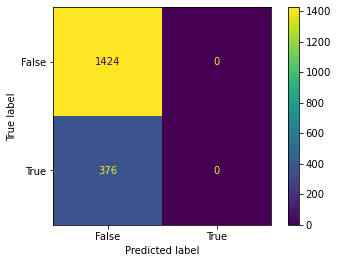

In [206]:
ConfusionMatrixDisplay.from_predictions(y_test, deep_pred, display_labels = [False, True])
plt.show()

## LightGBM

In [207]:
# define the LightGBM classifier
lgb_awal = LGBMClassifier(random_state = 123)

In [208]:
lgb_awal.fit(X_train_clean, y_train)

LGBMClassifier(random_state=123)

In [209]:
# train the classifier
lgb_awal.score(X_train_clean, y_train)

0.917

In [210]:
# make predictions on the testing set
lgb_pred = lgb_awal.predict(X_test_clean)

In [211]:
print(f"Training Data Score: {lgb_awal.score(X_train_clean, y_train)}")
print(f"Validating Data Score: {lgb_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lgb_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.917
Validating Data Score: 0.8733333333333333
Testing Data Score: 0.8694444444444445


In [212]:
print(classification_report(y_test, lgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1424
           1       0.77      0.54      0.63       376

    accuracy                           0.87      1800
   macro avg       0.83      0.75      0.78      1800
weighted avg       0.86      0.87      0.86      1800



## Tuning Parameter LightGBM

In [213]:
# define the LightGBM classifier
lgb = LGBMClassifier()

In [214]:
# define the hyperparameters to tune
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [215]:
# create the grid search object
grid_search_lgb = GridSearchCV(lgb, param_grid=param_grid, cv=5)

In [216]:
# train the grid search object
grid_search_lgb.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'num_leaves': [10, 20, 30]})

In [217]:
best_params = grid_search_lgb.best_params_

In [218]:
lgbm_best = LGBMClassifier(**best_params)

In [219]:
lgbm_best.fit(X_train_clean, y_train)

LGBMClassifier(max_depth=5, num_leaves=30)

In [220]:
lgb_best_pred = lgbm_best.predict(X_test_clean)

In [221]:
print(classification_report(y_test, lgb_best_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1424
           1       0.76      0.54      0.63       376

    accuracy                           0.87      1800
   macro avg       0.82      0.75      0.78      1800
weighted avg       0.86      0.87      0.86      1800



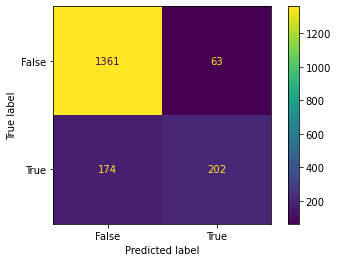

In [222]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_best_pred, display_labels = [False, True])
plt.show()

In [223]:
# evaluate the classifier using accuracy score and ROC AUC score
acc = accuracy_score(y_test, lgb_best_pred)
roc_auc = roc_auc_score(y_test, lgb_best_pred)
print('Accuracy:', acc)
print('ROC AUC score:', roc_auc)

Accuracy: 0.8683333333333333
ROC AUC score: 0.7464962347597418


In [225]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {'Logistic Regression': logreg_awal, 
          'Logistic Regression CV': lr_grid_cv,
          'Decision Tree': decTree, 
          'Decision Tree CV': best_decTree,
          'Support Vector Classifier':svc_ori,
          'Support Vector Classifier CV':svc_grid_cv,
          'Random Forest':random_forest,
          'Random Forest CV':random_forestcls_cv,
          'Ridge':ridge,
          'Ridge CV':ridge_cv,
          'KNN':knn_awal,
          'KNN CV':kn_grid,
          'Bagging':bagging_cls,
          'Bagging CV':bagging_cv,
          'gradient Boosting':grad_boost,
          'gradient Boosting CV':gradboost_cv,
          'Adaboost':abc_ori,
          'Adaboost SVC':adaboost_svc,
          'Adaboost CV':adaboost_best,
          'Extratrees':extra_trees_awal,
          'Extratrees CV':extra_trees_best,
          'XGboost':xgb_classifier,
          'XGboost CV':xgb_best,
          'LightGBM':lgb_awal,
          'LightGBM CV':lgbm_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
print(df_results)


                              precision    recall  f1_score  accuracy  \
Logistic Regression            0.783109  0.810000  0.774771  0.810000   
Logistic Regression CV         0.786511  0.811667  0.774114  0.811667   
Decision Tree                  0.801276  0.798889  0.800043  0.798889   
Decision Tree CV               0.852122  0.860000  0.845564  0.860000   
Support Vector Classifier      0.858290  0.858333  0.836229  0.858333   
Support Vector Classifier CV   0.854877  0.850000  0.821057  0.850000   
Random Forest                  0.852944  0.853889  0.830103  0.853889   
Random Forest CV               0.859963  0.865556  0.850963  0.865556   
Ridge                          0.771130  0.801667  0.744961  0.801667   
Ridge CV                       0.771130  0.801667  0.744961  0.801667   
KNN                            0.810844  0.827778  0.811822  0.827778   
KNN CV                         0.806523  0.823333  0.790137  0.823333   
Bagging                        0.849576  0.858889  

In [226]:
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
Logistic Regression,0.783109,0.810000,0.774771,0.810000,0.722373,0.599039,0.615634,0.783109,0.810000,0.774771
Logistic Regression CV,0.786511,0.811667,0.774114,0.811667,0.732266,0.596178,0.612157,0.786511,0.811667,0.774114
Decision Tree,0.801276,0.798889,0.800043,0.798889,0.697052,0.701627,0.699267,0.801276,0.798889,0.800043
Decision Tree CV,0.852122,0.860000,0.845564,0.860000,0.825318,0.712848,0.747326,0.852122,0.860000,0.845564
Support Vector Classifier,0.858290,0.858333,0.836229,0.858333,0.858179,0.684392,0.724320,0.858290,0.858333,0.836229
Support Vector Classifier CV,0.854877,0.850000,0.821057,0.850000,0.865615,0.656616,0.693608,0.854877,0.850000,0.821057
Random Forest,0.852944,0.853889,0.830103,0.853889,0.850619,0.674733,0.713070,0.852944,0.853889,0.830103
Random Forest CV,0.859963,0.865556,0.850963,0.865556,0.841646,0.718317,0.755382,0.859963,0.865556,0.850963
Ridge,0.771130,0.801667,0.744961,0.801667,0.717971,0.552669,0.547528,0.771130,0.801667,0.744961
Ridge CV,0.771130,0.801667,0.744961,0.801667,0.717971,0.552669,0.547528,0.771130,0.801667,0.744961


# Save Model

## Logistic Regression

In [227]:
logreg = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/logreg.pkl'
with open(logreg, 'wb') as file:
    pickle.dump(logreg_awal, file)
    
logreg_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/logreg_cv.pkl'
with open(logreg_cv, 'wb') as file:
    pickle.dump(lr_grid_cv, file)

## Support Vector Classifier

In [228]:
svc = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/svc.pkl'
with open(svc, 'wb') as file:
    pickle.dump(svc_ori, file)
    
svc_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/svc_cv.pkl'
with open(svc_cv, 'wb') as file:
    pickle.dump(svc_grid_cv, file)

## Decisiontree

In [229]:
dectree = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/dectree.pkl'
with open(dectree, 'wb') as file:
    pickle.dump(decTree, file)
    
dectree_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/dectree_cv.pkl'
with open(dectree_cv, 'wb') as file:
    pickle.dump(best_decTree, file)

## Randomforest

In [230]:
randomforest = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/randomforest.pkl'
with open(randomforest, 'wb') as file:
    pickle.dump(random_forest, file)
    
randomforest_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/randomforest_cv.pkl'
with open(randomforest_cv, 'wb') as file:
    pickle.dump(random_forestcls_cv, file)

## Ridge Classifier

In [231]:
ridge = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/ridge.pkl'
with open(ridge, 'wb') as file:
    pickle.dump(ridge, file)
    
ridge_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/ridge_cv.pkl'
with open(ridge_cv, 'wb') as file:
    pickle.dump(ridge_cv, file)

## KNN 

In [232]:
knn = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/knn.pkl'
with open(knn, 'wb') as file:
    pickle.dump(knn_awal, file)
    
knn_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/knn_cv.pkl'
with open(knn_cv, 'wb') as file:
    pickle.dump(kn_grid, file)

## Bagging Classifier

In [233]:
bagging = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/bagging.pkl'
with open(bagging, 'wb') as file:
    pickle.dump(bagging_cls, file)
    
bagging_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/bagging_cv.pkl'
with open(bagging_cv, 'wb') as file:
    pickle.dump(bagging_cv, file)

## Gradient Boosting

In [234]:
grad_boost = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/grad_boost.pkl'
with open(grad_boost, 'wb') as file:
    pickle.dump(grad_boost, file)
    
grad_boost_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/grad_boost_cv.pkl'
with open(grad_boost_cv, 'wb') as file:
    pickle.dump(gradboost_cv, file)

## Adaboost

In [235]:
adaboost_svc = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/adaboost_svc.pkl'
with open(adaboost_svc, 'wb') as file:
    pickle.dump(adaboost_svc, file)
    
adaboost_ori = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/adaboost_ori.pkl'
with open(adaboost_ori, 'wb') as file:
    pickle.dump(abc_ori, file)
    
adaboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/adaboost_cv.pkl'
with open(adaboost_cv, 'wb') as file:
    pickle.dump(adaboost_best, file)

## Extratrees

In [236]:
extra_trees = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/extra_trees.pkl'
with open(extra_trees, 'wb') as file:
    pickle.dump(extra_trees_awal, file)
    
extra_tree_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/extra_tree_cv.pkl'
with open(extra_tree_cv, 'wb') as file:
    pickle.dump(extra_trees_best, file)

## XgBoost

In [237]:
xgboost = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/xgboost.pkl'
with open(xgboost, 'wb') as file:
    pickle.dump(xgb_classifier, file)
    
xgboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/xgboost_cv.pkl'
with open(xgboost_cv, 'wb') as file:
    pickle.dump(xgb_best, file)

## Deep Learning

In [238]:
deep_learning = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/deep_learning.pkl'
with open(deep_learning, 'wb') as file:
    pickle.dump(model, file)
    
    
deep_learning_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/deep_learning_cv.pkl'
with open(deep_learning_cv, 'wb') as file:
    pickle.dump(grid_result, file)

INFO:tensorflow:Assets written to: C:\Users\HALAL\AppData\Local\Temp\tmp0de6a86h\assets


## LightGBM

In [239]:
lgbm = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/lgbm.pkl'
with open(lgbm, 'wb') as file:
    pickle.dump(lgb_awal, file)
    
lgbm_cv = 'C:/Users/HALAL/Final Project ML Process/model/1 - Model Unbalance Dataset/lgbm_cv.pkl'
with open(lgbm_cv, 'wb') as file:
    pickle.dump(lgbm_best, file)

## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"''"